# Introducción

En esta práctica vamos a examinar un conjunto de datos que contiene información biométrica y de salud, con el fin de determinar la presencia o ausencia del hábito de fumar en los individuos a partir de señales bio-saludables. El archivo smoking.csv que utilizaremos incluye características diferentes, tales como edad, peso, altura, niveles de glucosa en ayuno y colesterol, entre otros.

Este análisis nos permitirá aplicar y profundizar en técnicas de Machine Learning como SVM y kNN, así como en métodos de ingeniería de características, esenciales para la preparación y optimización de los datos para la modelización. Abordaremos la transformación de variables numéricas y categóricas, y exploraremos cómo estos procesos afectan el rendimiento de los modelos predictivos.

Comenzaremos con una exploración de los datos para entender su estructura y las relaciones entre las diferentes variables. Posteriormente, prepararemos los datos para su análisis, aplicando técnicas de preprocesamiento y generando nuevas características que nos ayudarán a capturar la complejidad del conjunto de datos y a mejorar la precisión de nuestros modelos predictivos.

## El Dataset

El conjunto de datos con el que trabajaremos incluye una serie de atributos relacionados con la salud y mediciones biométricas. Aquí está la descripción de cada atributo y su posible asociación con el hábito de fumar:

* **ID**: Identificador único para cada individuo en el dataset. No tiene asociación directa con el hábito de fumar.
* **Gender**: Género del individuo, que puede tener variaciones en la prevalencia del hábito de fumar.
* **Age**: Edad del individuo, presentada en intervalos de 5 años. La prevalencia del hábito de fumar a menudo disminuye con la edad.
* **Height**: Altura en centímetros. No tiene una asociación directa con el hábito de fumar.
* **Weight**: Peso en kilogramos. El fumar puede influir en el peso y varía individualmente.
* **Waist**: Circunferencia de la cintura en centímetros. El fumar puede afectar la distribución de la grasa corporal.
* **Eyesight** (Left/Right): Medición de la agudeza visual para el ojo izquierdo/derecho. No tiene asociación directa con el hábito de fumar.
* **Hearing** (Left/Right): Medición de la audición para el oído izquierdo/derecho. No tiene asociación directa con el hábito de fumar.
* **Systolic BP**: Presión arterial sistólica. El fumar puede afectar la presión arterial.
* **Diastolic BP**: Presión arterial diastólica. El fumar puede afectar la presión arterial.
* **Fasting Blood Sugar**: Nivel de azúcar en sangre en ayuno. El fumar puede impactar los niveles de azúcar en sangre.
Cholesterol (Total): Nivel total de colesterol. El fumar puede influir en los niveles de colesterol.
* **Triglyceride**: Nivel de triglicéridos. El fumar puede influir en los niveles de triglicéridos.
* **HDL Cholesterol**: Nivel de colesterol HDL. El fumar puede disminuir los niveles de colesterol HDL.
* **LDL Cholesterol**: Nivel de colesterol LDL. El fumar puede influir en los niveles de colesterol LDL.
* **Hemoglobin**: Nivel de hemoglobina. No tiene asociación directa con el hábito de fumar.
* **Urine Protein**: Presencia de proteína en la orina. El fumar puede impactar la función renal.
* **Serum Creatinine**: Nivel de creatinina en suero. El fumar puede impactar la función renal.
* **AST/ALT**: Niveles de transaminasas glutámico oxaloacéticas. El fumar puede impactar la función hepática.
* **GTP**: Nivel de γ-GTP. El fumar puede impactar el nivel de enzimas hepáticas.
* **Oral Exam Status**: Estado del examen oral. El fumar puede impactar la salud oral.
* **Dental Caries**: Presencia de caries dentales. El fumar puede afectar la salud dental.
* **Tartar Status**: Estado del tártaro. El fumar puede afectar la salud dental.
* **Blood Group**: Grupo sanguíneo del individuo.
* **Smoking Status**: Indica si el individuo es fumador o no. Esta es la variable objetivo que indica directamente el hábito de fumar.

Es importante comprender estas asociaciones, ya que nos ayudarán a determinar qué características pueden ser más relevantes para nuestros modelos predictivos y cómo podríamos necesitar transformarlas para mejorar la precisión de nuestras predicciones.







# 0. Importación de librerías

In [2]:
# Importamos pandas y matplotlib para visualizar y trabajar con los datos

import pandas as pd
import matplotlib.pyplot as plt

# Exploración Inicial de Datos

**Ejercicio 1** - Declara el tamaño del dataset. Con respecto a las columnas, identifica qué variables son numéricas y cuáles son categóricas. ¿Cuál es el individuo menos pesado? ¿Y el más alto? Dibuja un histograma de hombres y mujeres atendiendo a si fuman o no.

In [3]:
df=pd.read_csv('habitos_fumadores.csv')

# Vamos a usar las funciones shape y dtype para encontrar el número de filas y columnas y para ver que tipo de dato podemos encontrar en cada columna.

print(df.shape)
print(df.dtypes)

x=df['weight(kg)'].min()
y=df['height(cm)'].max()
print('El individuo con menos peso tiene una masa corporal de ' +str(x) + 'Kg')
print('El individuo más alto tiene una altura de '+str(y)+'cm')

(55692, 28)
ID                       int64
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
blood_group             object
dtype: object
El individuo con menos peso tiene una masa corporal de 30Kg
El individuo más alto tiene una altura de 190c

Como podemos observar, estamos trabajando con un dataset con 28 columnas con datos de 55692 personas. De este dataset, 24 datos son numéricos y 4 son de tipo caracter. El individuo menos pesado y el más alto tienen, respectivamente, un peso de 30 Kg y una altura de 190cm.

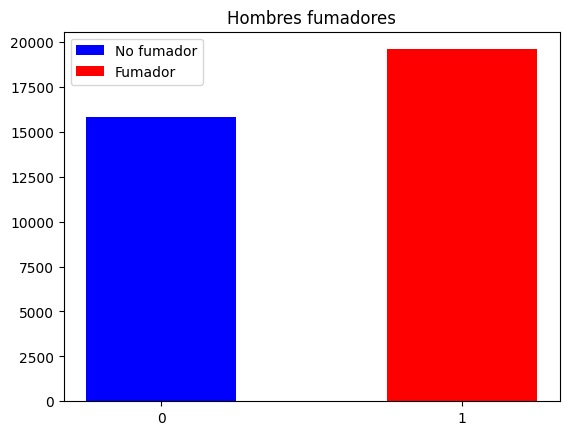

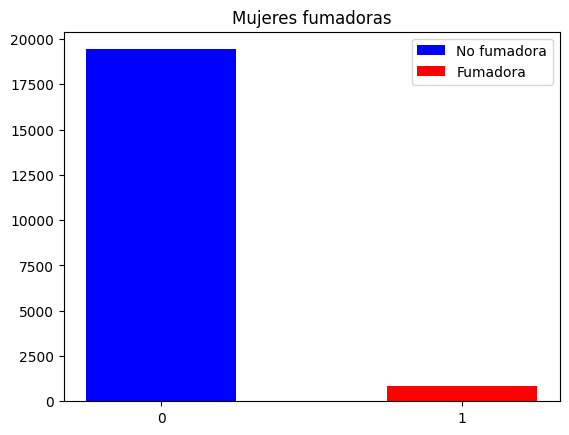

In [11]:
# Histograma de fumadores

# Dvidimos el DataFrame para hacer un histograma para cada género

df_hombres=df[df['gender']=='M']
df_mujeres=df[df['gender']=='F']

plt.hist(df_hombres[df_hombres['smoking'] == 0]['smoking'], bins=[-0.5, 0.5], rwidth=0.5, color='blue', label='No fumador')
plt.hist(df_hombres[df_hombres['smoking'] == 1]['smoking'], bins=[0.5, 1.5], rwidth=0.5, color='red', label='Fumador')
plt.xticks([0, 1])
plt.title('Hombres fumadores')
plt.legend()
plt.show()

plt.hist(df_mujeres[df_mujeres['smoking'] == 0]['smoking'], bins=[-0.5, 0.5], rwidth=0.5, color='blue', label='No fumadora')
plt.hist(df_mujeres[df_mujeres['smoking'] == 1]['smoking'], bins=[0.5, 1.5], rwidth=0.5, color='red', label='Fumadora')
plt.xticks([0, 1])
plt.ylabel=('Número de personas')
plt.title('Mujeres fumadoras')
plt.legend()
plt.show()

In [13]:
# Vamos a calcular el porcentaje exacto e fumadores en cada grupo

hombres = df[df['gender'] == 'M']
mujeres = df[df['gender'] == 'F']

porcentaje_hombres_fumadores = (len(hombres[hombres['smoking'] == 1]) / len(hombres)) * 100
porcentaje_mujeres_fumadoras = (len(mujeres[mujeres['smoking'] == 1]) / len(mujeres)) * 100

print(f"Porcentaje de hombres fumadores: {porcentaje_hombres_fumadores:.2f}%")
print(f"Porcentaje de mujeres fumadoras: {porcentaje_mujeres_fumadoras:.2f}%")

Porcentaje de hombres fumadores: 55.35%
Porcentaje de mujeres fumadoras: 4.23%


Podemos ver los histogramas de hombres y mujeres atendiendoa si fuman o no fuman(0=no fumador, 1=fumador). Como podemos observar, los hombres tienen una tendencia muchísimo mayor, al menos en este caso de estudio, al tabaquismo en comparación con las mujeres.

**Ejercicio 2** - Sobre la variable continua "age" aplica una binarización por umbralización, tomando como umbral la media de las edades, incluyendo esta variable en el Dataframe como "age_bin". Haz un conteo de las dos categorías resultantes en la variable binarizada. Sobre la variable continua "Cholesterol" aplica una agrupación por cuantiles usando percentiles. Incluye esta variable en el dataframe como "Cholesterol_per".

In [14]:
# Calculamos la media de edad

edad_media=df['age'].mean()

# Creamos la variable age_bin

df['age_bin']=df['age'].apply(lambda x: 1 if x > edad_media else 0)
df.head()

print(df['age_bin'].value_counts())
print('edad media: ', edad_media)

age_bin
0    28847
1    26845
Name: count, dtype: int64
edad media:  44.18291675644617


La edad media resulta ser de 44,18 años, estando 26845 personas por encima y 28847 personas por debajo.

In [15]:
df['Cholesterol_per'] = pd.qcut(df['Cholesterol'], q=100, labels=False, duplicates='drop')

**Ejercicio 3** - Sobre la variable continua "fasting blood sugar" aplica un escalado máximo-mínimo. Dibuja un histograma de la variable original y otro histograma de la variable tras el escalado: ¿qué conclusiones sacas viendo ambos histogramas?

In [16]:
max=df['fasting blood sugar'].max()
media=df['fasting blood sugar'].mean()
mediana=df['fasting blood sugar'].median()

print('media: ', media)
print('mediana: ', mediana)
print('máximo: ', max)

media:  99.312324929972
mediana:  96.0
máximo:  505.0


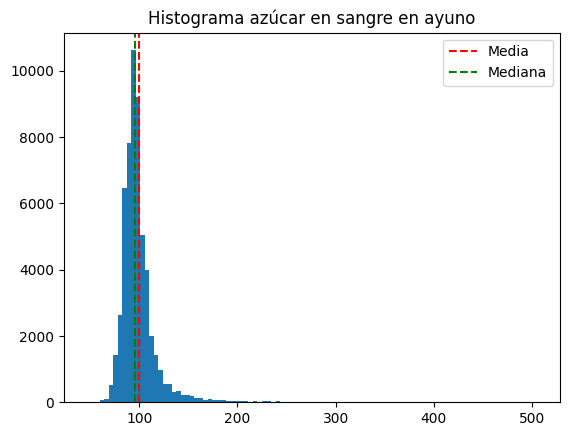

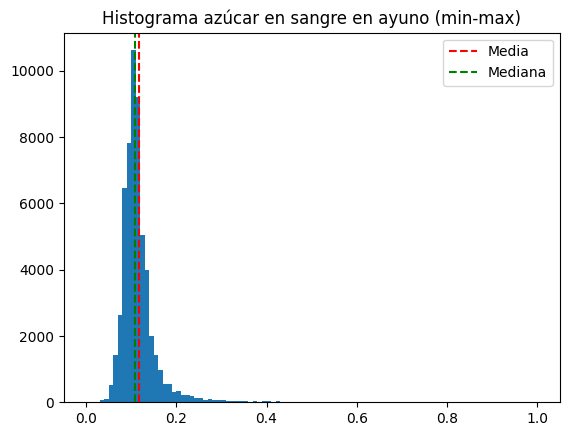

In [19]:
# Calculados el máximo y el mínimo para realizar el escalado
max_fasting_blood_sugar = df['fasting blood sugar'].max()
min_fasting_blood_sugar = df['fasting blood sugar'].min()

# Realizamos el escalado

df['fasting blood sugar(min-max)'] = (df['fasting blood sugar'] - min_fasting_blood_sugar) / (max_fasting_blood_sugar - min_fasting_blood_sugar)

# Ploteamos ambos histogramas

plt.hist(x=df['fasting blood sugar'], bins=100)
plt.title('Histograma azúcar en sangre en ayuno')
plt.axvline(df['fasting blood sugar'].mean(), color='red', linestyle='dashed', label='Media')
plt.axvline(df['fasting blood sugar'].median(), color='green', linestyle='dashed', label='Mediana')
plt.legend()
plt.show()


plt.hist(x=df['fasting blood sugar(min-max)'], bins=100)
plt.title('Histograma azúcar en sangre en ayuno (min-max)')
plt.axvline(df['fasting blood sugar(min-max)'].mean(), color='red', linestyle='dashed', label='Media')
plt.axvline(df['fasting blood sugar(min-max)'].median(), color='green', linestyle='dashed', label='Mediana')
plt.legend()
plt.show()


Podemos observar una distribución con presencia de unos cuantos valores muy grandes (outliers). La distribución tiene la gran mayoría de valores entre 0 y 200 aproximadamente, sin embargo el valor máximo es de 505. En definitiva, nos encontramos con una distribución con una asimetría positiva, con una cola larga hacia la derecha de valores muy grandes y poca frecuencia, lo que conlleva una media más alta que la mediana.  El escalado min-max es sensible a los outliers, ya que solo comprime los datos entre 0 y 1, no realiza ningún cambio en su distribución, por lo que no nos ayuda a visualizar mejor la información acerca del nivel de azúcar en sangre del grupo de estudio.

**Ejercicio 4** - Aisla la variable discreta "blood_group" en un dataframe que se componga de esa única variable. Genera 3 dataframes diferentes:

*   Uno con variables generadas mediante el método one-hot encoding
*   Otro con variables generadas mediante el método dummy coding
*   Un último con variables generadas mediante el método effect coding



In [20]:
# Creamos el dataframe solo con la variable 'blood_group'

df_blood=df['blood_group']

# One-hot encoding

df_blood_ohe = pd.get_dummies(df_blood).astype(int)
df_blood_ohe.head()


,0+,A+,A-,B+
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0


Hemos aplicado el one hot encoding, creando una columna binaria para cada valor posible del tipo de sangre.

In [21]:
# Dummy coding

df_blood_dummy=pd.get_dummies(df_blood, drop_first=True).astype(int)
df_blood_dummy.head()

,A+,A-,B+
0,1,0,0
1,0,1,0
2,0,0,0
3,1,0,0
4,0,1,0


Como existe información redundante, simplemente desechamos una de las columnas, ya que de las otras tres se puede obtener toda la información.

In [22]:
# Effect coding

df_blood_ec=df_blood_dummy.copy()
mask_all_zero = (df_blood_ec.sum(axis=1) == 0)

# Identificamos las filas donde todas las columnas son 0
mask_all_zero = (df_blood_ec.sum(axis=1) == 0)

# Sustituimos los 0 por -1 en las filas identificadas
df_blood_ec.loc[mask_all_zero, :] = -1
df_blood_ec.head()




,A+,A-,B+
0,1,0,0
1,0,1,0
2,-1,-1,-1
3,1,0,0
4,0,1,0


Y para este caso, a partir de la tabla creada en el caso Dummy, simplemente sustituimos por -1 los valores de las filas en las que solo tengamos ceros, indicando que esa fila corresponde al grupo que hemos eliminado (0+).

# Preprocesamiento de Datos

**Ejercicio 5**: En esta sección, continuar con la preparación de nuestro conjunto de datos para el análisis. Basándose en las tareas realizadas anteriormente:

* **División del conjunto de datos**: Segmentar los datos utilizando la librería scikitlearn con la semilla reproducible "1234", utilizando un 80% de conjunto de entrenamiento y un 20% de conjunto de testeo. Indicar el tamaño de ambos conjuntos.

In [23]:
!pip install scikit-learn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Primero vamos a transformar todas las variables categóricas en numéricas, ya que el método que vamos a utilizar no soporta variables categóricas

In [24]:
# Eliminamos la columna 'blood_group' y la sustituimos por una de sus transformaciones numéricas

df_new=pd.concat([df, df_blood_dummy],axis=1)
df_new=df_new.drop('blood_group', axis=1)

# Binarizamos tanto la variable 'tartar' como la variable 'gender'

df_new['tartar']=df_new['tartar'].apply(lambda x: 1 if x=='Y' else 0)

df_new['gender']=df_new['gender'].apply(lambda x: 1 if x=='M' else 0)

# Eliminamos la variable 'oral' ya que todos los valores son iguales, por lo que no aporta información al modelo

df_new=df_new.drop('oral', axis=1)

x=df_new.drop('smoking', axis=1)
y=df_new['smoking']

# Dividimos el conjunto de datos

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [25]:
# Eliminamos la columna 'blood_group' y la sustituimos por una de sus transformaciones numéricas

df_new=pd.concat([df, df_blood_dummy],axis=1)
df_new=df_new.drop('blood_group', axis=1)

# Binarizamos tanto la variable 'tartar' como la variable 'gender'

df_new['tartar']=df_new['tartar'].apply(lambda x: 1 if x=='Y' else 0)

df_new['gender']=df_new['gender'].apply(lambda x: 1 if x=='M' else 0)

In [26]:
df['oral'].value_counts()

,count
oral,
Y,55692


Podemos observar que la variable oral solo tiene un valor, por lo que no aporta ningún tipo de información, y por lo tanto podemos eliminarla del dataset.

In [27]:
df_new=df_new.drop('oral', axis=1)

# Vamos a pasar a definir las variables predictoras y objetivo

x=df_new.drop('smoking', axis=1)
y=df_new['smoking']

# Dividimos el conjunto de datos

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [28]:
# Vamos a estandarizar el DataFrame

scaler=StandardScaler()
X_scaled=scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


# Análisis Exploratorio de Datos (EDA)

**Ejercicio 6**: Explorar profundamente los datos para obtener insights que guíen la construcción del modelo:

* **Distribución de variables**: Para la variable "age" aplicar una agrupación por cuantiles utilizando deciles. Para cada grupo calcular el WoE asociado de forma manual. Calcular el IV de la variable discretizada con respecto al target. ¿Crees que es una variable importante de cara a su relación con la variable objetivo (smoking)?

* **Relaciones entre variables**: Realiza el mismo ejercicio para la variable "Height". Segun los resultados obtenidos, ¿cuál crees que tiene un poder predictor más fuerte?

In [29]:
# Age
# Dividimos los datos por deciles

df['age_per']=pd.qcut(df['age'], q=10, labels=False, duplicates='drop')

df['age_per'].value_counts()

,count
age_per,
2,15181
0,9186
3,7037
6,6167
4,5549
5,5020
1,4480
7,3072


Debido a la distribución de las edades y la forma con la que trabaja pd.qcut, solo obtenemos 8 divisiones. Esto se debe a que en caso de que existan muchos datos repetidos, al calcular los deciles, varios de ellos pueden caer en el mismo valor de edad, y al eliminar los duplicados, ya que de otra manera devuelve un error, se fusionan los deciles y acabamos solo con 8 divisiones. Podría calcularse así, y evitar problemas con límites de grupos identicos, pero ya que se especifica en el enunciado que se quiere una división en deciles, vamos a forzar a que se hagan las diez divisiones.

In [30]:
# Ordenamos el dataframe en función del valor de la variable 'age'

df_new=df_new.sort_values(by='age')
df_new.head()

df_new['age_per'] = pd.qcut(df_new['age'].rank(method='first'), q=10, labels=False, duplicates='drop')

df_new['age_per'].value_counts()

df_new.groupby('age_per')['age'].agg(['min', 'max'])


,min,max
age_per,,
0,20,30
1,30,35
2,35,40
3,40,40
4,40,40
5,40,45
6,45,50
7,50,55
8,55,60


In [32]:
# Separamos cada decil en una variable separada

age_0=df_new[df_new['age_per']==0]
age_1=df_new[df_new['age_per']==1]
age_2=df_new[df_new['age_per']==2]
age_3=df_new[df_new['age_per']==3]
age_4=df_new[df_new['age_per']==4]
age_5=df_new[df_new['age_per']==5]
age_6=df_new[df_new['age_per']==6]
age_7=df_new[df_new['age_per']==7]
age_8=df_new[df_new['age_per']==8]
age_9=df_new[df_new['age_per']==9]

In [39]:
# Woe=ln(%buenos/%malos)

total=len(df_new[df_new['smoking']==0])+len(df[df['smoking']==1])

# Definimos una función que nos calcule el Woe de caada decil

def Woe(df):

  woe=np.log(((len(df[df['smoking']==0]))/(total))/(((len(df[df['smoking']==1]))/total)))
  return woe


age= [age_0, age_1, age_2, age_3, age_4, age_5, age_6, age_7, age_8, age_9]

# Le aplicamos la función a cada decil y la guardamos en un vector

Woe_age=[Woe(age_0), Woe(age_1), Woe(age_2), Woe(age_3), Woe(age_4), Woe(age_5), Woe(age_6), Woe(age_7), Woe(age_8), Woe(age_9)]
Woe_age_sum=np.sum(Woe_age)

print('Woe para age por deciles: ',Woe_age)
print('Woe total: ', Woe_age_sum)

Woe para age por deciles:  [0.09126617004338607, 0.014006334198045547, 0.2210428799430284, 0.5503861454970447, 0.5210860580292032, 0.6918007416868138, 0.6341889157132286, 0.7596204485854434, 0.9111428769500508, 1.2073990652700226]
Woe total:  5.601939635916268


Podemos ver que a medida que avanzan los deciles, el valor de Woe se hace mayor, lo que indica una correlación negativa del hábito de fumar con la edad, es decir, una amyor tendencia de los jovenes a fumar respecto a las personas más mayores.

In [34]:
# IV

IV = 0
for i, z in zip(Woe_age, age):
    buenos_decil = len(z[z['smoking'] == 0])
    malos_decil = len(z[z['smoking'] == 1])
    IV += ((buenos_decil / total) - (malos_decil / total)) * i

IV

0.20495386740363042

In [35]:
# Vamos a repetir el proceso anterior pero para la variable 'height'

df_new=df_new.sort_values(by='height(cm)')
df_new.head()

df_new['height_per'] = pd.qcut(df_new['height(cm)'].rank(method='first'), q=10, labels=False, duplicates='drop')

df_new['height_per'].value_counts()

df_new.groupby('height_per')['height(cm)'].agg(['min', 'max'])


,min,max
height_per,,
0,130,150
1,150,155
2,155,160
3,160,160
4,160,165
5,165,170
6,170,170
7,170,175
8,175,175


In [40]:
height_0 = df_new[df_new['height_per'] == 0]
height_1 = df_new[df_new['height_per'] == 1]
height_2 = df_new[df_new['height_per'] == 2]
height_3 = df_new[df_new['height_per'] == 3]
height_4 = df_new[df_new['height_per'] == 4]
height_5 = df_new[df_new['height_per'] == 5]
height_6 = df_new[df_new['height_per'] == 6]
height_7 = df_new[df_new['height_per'] == 7]
height_8 = df_new[df_new['height_per'] == 8]
height_9 = df_new[df_new['height_per'] == 9]


height = [height_0, height_1, height_2, height_3, height_4, height_5, height_6, height_7, height_8, height_9]

Woe_height = [Woe(height_0), Woe(height_1), Woe(height_2), Woe(height_3), Woe(height_4), Woe(height_5), Woe(height_6), Woe(height_7), Woe(height_8), Woe(height_9)]

print('Woe para height por deciles: ',Woe_height)

Woe para height por deciles:  [3.195967008494804, 2.5063030887687274, 1.5776689045337333, 1.2081794008539037, 0.22031583785660064, 0.08804390160381903, -0.1949044824555029, -0.18330921119522717, -0.33308709721384694, -0.22936654791902356]


Observando los valores por deciles, podemos ver que a medida que aumenta la altura, hay más fumadores en lños grupos, hasta el punto en que a partir del séptimo decil existen más fumadores que no fumadores.

In [41]:
# Calcular total de buenos y malos (global)
total_buenos = len(df[df['smoking']==0])
total_malos = len(df[df['smoking']==1])


# Lista de deciles
height_list = [height_0, height_1, height_2, height_3, height_4, height_5, height_6]

# Calcular WoE para cada decil

Woe_height = [Woe(height_0), Woe(height_1), Woe(height_2), Woe(height_3), Woe(height_4), Woe(height_5), Woe(height_6)]
Woe_height_sum=np.sum(Woe_height)
Woe_height_sum
# Calcular IV
IV_height = 0
for i, decil in zip(Woe_height, height_list):
  buenos_decil = len(decil[decil['smoking'] == 0])
  malos_decil = len(decil[decil['smoking'] == 1])
  IV_height += ((buenos_decil / total_buenos) - (malos_decil / total_malos)) * i   # Ponderación

print("WoE para height:", Woe_height_sum)
print("IV para height:", IV_height)

WoE para height: 8.601573659656086
IV para height: 0.9740438883944537


La variable 'weight' tiene un poder predictivo medio, con un IV=0.2049, mientras que para la variable 'height' tiene un valor IV=0.9469, lo que indica un poder predictivo muy alto. Esto no se debe a la correlación entre la altura y el hábito de fumar, si no a la gran disparidad de fumadores entre hombres y mujeres, habiendo más fumadores entre los hombres, lo que provoca que la media de altura de los fumadores sea mayor.

# Selección de Características

**Ejercicio 7**: Evaluar y seleccionar las características más informativas para el modelo:

* **Determinación de características relevantes**: Utilizando el atributo ".corr()" del DataFrame en formato pandas enuncia las 3 variables que más se correlen con la variable objetivo. ¿Qué interpretación lógica puedes dar a la correlación obtenida con respecto a dichas variables?


In [42]:
# Calculamos la matriz de correlación
correlation_matrix = df_new.corr()['smoking'].sort_values(ascending=False)

# Mostramos las tres variables con más correlación con el estado de fumador
print(correlation_matrix.head(4))

smoking       1.000000
gender        0.510340
hemoglobin    0.400678
height_per    0.399787
Name: smoking, dtype: float64


Podemos observar que las variables que guardan más relación con la variable 'smoking' son el género, los niveles de hemoglobina y la altura. La interpretación de estas variables es la siguiente:

-Género: El género tiene una gran influencia en las posibilidades de ser fumador o no serlo, siendo los hombres mucho más propensos que las mujeres a fumas. Esto puede darse por diferencias de conducta derivadas de las diferencias en educación y biológicas (predisposición a la adicción) presentes entre gombres y mujeres.

-Altura: Como ya hemos comentado antes, esta correlación se debe a la mayor propensión a ser fumadores de los hombres, que son más altos que las mujeres en promedio.

-Hemoglobina: Este es un fenómeno estudiado, ya que el hábito de fumar puede llevar a un aumento de la hemoglobina en sangre debido a la mayor exposición al monóxido de carbono.

# Construcción del Modelo

**Ejercicio 8**: Elegir y aplicar el modelo de clasificación adecuado a partir de las opciones vistas en clase:

* **Entrenamiento**: Capacitar el modelo seleccionado con el conjunto de entrenamiento mediante el algoritmo kNN o el SVM. Justifica tu respuesta.


Dado que estamos trabajando con un conjunto de datos con alta dimensinalidad (27 características o variables predictoras) en principio un modelo SVM debería ser mejor para predecir si los objetos de estudio son fumadores o no, ya que el método KNN tiene problemas al tratar con este tipo de conjuntos de datos.

In [ ]:
#Importamos las funciones necesarias para el modelo

from sklearn.metrics import roc_auc_score, classification_report
from sklearn.svm import SVC

In [ ]:
cfl=SVC(C=3, kernel='rbf')
cfl.fit(X_train_scaled, Y_train)

SVC(C=3)

# Evaluación del Modelo

**Ejercicio 9**: Evaluar el rendimiento del modelo es clave para entender su efectividad. Se incluye:

* **Comparación de métricas**: Observar y analizar métricas de rendimiento vistas en clase tales como el accuracy, la precisión, recall, F1-score, AUC-ROC y matriz de confusión. ¿Qué conclusiones se pueden extraer de cada una de estás métricas?

* **Validación cruzada**: Utilizar la validación cruzada para optimizar hiperparámetros y confirmar la estabilidad del modelo. ¿Cuál es la mejor configuración de parámetros?

In [ ]:
# Calculamos las predicciones del modelo
Y_pred = cfl.predict(X_test_scaled)

# Generamos las métricas de evaluación del modelo y las printeamos
print(classification_report(Y_test, Y_pred))

roc_auc=roc_auc_score(Y_test, Y_pred)
gini=2*roc_auc-1
print('AUC-ROC:', roc_auc)
print('Gini:', gini)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      7031
           1       0.68      0.71      0.69      4108

    accuracy                           0.77     11139
   macro avg       0.75      0.76      0.75     11139
weighted avg       0.77      0.77      0.77     11139

AUC-ROC: 0.7555113070686958
Gini: 0.5110226141373917


Obtenemos unas métricas que podrían ser mejores. Además, si nos fijamos en las predicciones de cada clase, el modelo hace un trabajo más o menos bueno al clasificar a los no fumadores, obteniendo valores de 0.83, 0.80 y 0.81 para la precisión, el recall y el f-1 score respectivamente, pero el rendimiento para los fumadores baja considerablemente, hasta 0.68, 0.71 y 0.69.

Vamos a realizar la validación cruzada para ver si conseguimos mejorar el modelo.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Vamos a realizar la validación cruzada

# Elegimos el modelo a estudiar

pipeline = Pipeline([
    ('svm', SVC())
])

# Definimos los parámetros para la búsqueda en malla
parameters = {
    'svm__C': [1, 3, 5],
    'svm__gamma': [0.1, 1, 'scale'],
    'svm__kernel': ['rbf']}

# Configuramos GridSearchCV

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, cv=5, verbose=2)

# Realizamos la búsqueda con validación cruzada
grid_search.fit(X_train_scaled, Y_train)

# Imprimimos los mejores parámetros y el mejor score encontrados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de validación cruzada:", grid_search.best_score_)

# Evaluamos el mejor modelo encontrado en el conjunto de prueba
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test_scaled)

# Calculamos métricas de rendimiento
accuracy = metrics.accuracy_score(Y_test, Y_pred)
f1 = metrics.f1_score(Y_test, Y_pred, average='weighted')
recall = metrics.recall_score(Y_test, Y_pred, average='weighted')
precision = metrics.precision_score(Y_test, Y_pred, average='weighted')

print('\nPrecisión del modelo:', accuracy)
print('F1-Score:', f1)
print('Recall:', recall)
print('Precision:', precision)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejores parámetros: {'svm__C': 5, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Mejor score de validación cruzada: 0.7607567791280806

Precisión del modelo: 0.7682018134482449
F1-Score: 0.7689466965344611
Recall: 0.7682018134482449
Precision: 0.7699180281460907


In [ ]:
# Calculamos las predicciones del modelo
Y_pred_best = best_model.predict(X_test_scaled)

# Generamos las métricas de evaluación del modelo y las printeamos
print(classification_report(Y_test, Y_pred_best))

roc_auc=roc_auc_score(Y_test, Y_pred_best)
gini=2*roc_auc-1
print('AUC-ROC:', roc_auc)
print('Gini:', gini)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      7031
           1       0.68      0.70      0.69      4108

    accuracy                           0.77     11139
   macro avg       0.75      0.75      0.75     11139
weighted avg       0.77      0.77      0.77     11139

AUC-ROC: 0.7544500727547236
Gini: 0.5089001455094473


Como podemos observar, el rendimiento del mejor modelo de los analizados en la validación cruzada es prácticamente idéntico al anterior. Esto puede deberse a distintos motivos, entre ellos el hecho de que hemos probado un rango pequeño de posibilidades para los parámetros del modelo. Otro factor que puede ser relevante es el método que utiliza GridSearchCV para determinar que modelo es mejor, que es la precisión, puede no ser la mejor métrica cuando tenemos clases desvalanceadas, como ocurre en este caso, donde las mujeres fuman considerablemente menos que los hombres.

Vamos a probar reduciendo el número de características y aumentando el rango de parámetros analizazados en la validación cruzada. Vamos a seleccionar las variables que nos indica la matriz de correlación como mejores predictoras del hábito de fumar.

In [ ]:
# Repetimos el mismo proceso, pero esta vez con el DataFrame reducido.
x_filtrado=df_new[['gender', 'hemoglobin', 'weight(kg)',
       'triglyceride', 'Gtp']]

y=df_new['smoking']

X_train, X_test, Y_train, Y_test = train_test_split(x_filtrado, y, test_size=0.2, random_state=1234)

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

cfl=SVC(C=5, kernel='rbf')
cfl.fit(X_train_scaled, Y_train)


SVC(C=5)

In [ ]:
Y_pred = cfl.predict(X_test_scaled)

print(classification_report(Y_test, Y_pred))

roc_auc=roc_auc_score(Y_test, Y_pred)
gini=2*roc_auc-1
print('AUC-ROC:', roc_auc)
print('Gini:', gini)

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7042
           1       0.62      0.70      0.66      4097

    accuracy                           0.73     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.73      0.74     11139

AUC-ROC: 0.7263722834026907
Gini: 0.45274456680538133


In [ ]:
pipeline = Pipeline([
    ('svm', SVC())
])

parameters = {
    'svm__C': [1, 3, 5, 10],
    'svm__gamma': [0.1, 1, 'scale'],
    'svm__kernel': ['rbf']}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, cv=5, verbose=2)

grid_search.fit(X_train_scaled, Y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de validación cruzada:", grid_search.best_score_)


best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test_scaled)


accuracy = metrics.accuracy_score(Y_test, Y_pred)
f1 = metrics.f1_score(Y_test, Y_pred, average='weighted')
recall = metrics.recall_score(Y_test, Y_pred, average='weighted')
precision = metrics.precision_score(Y_test, Y_pred, average='weighted')

print('\nPrecisión del modelo:', accuracy)
print('F1-Score:', f1)
print('Recall:', recall)
print('Precision:', precision)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros: {'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Mejor score de validación cruzada: 0.7374812628334493

Precisión del modelo: 0.7354340605081247
F1-Score: 0.7375460390362961
Recall: 0.7354340605081247
Precision: 0.7412228367635805


In [ ]:
Y_pred = cfl.predict(X_test_scaled)

print(classification_report(Y_test, Y_pred))

roc_auc=roc_auc_score(Y_test, Y_pred)
gini=2*roc_auc-1
print('AUC-ROC:', roc_auc)
print('Gini:', gini)

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7042
           1       0.62      0.70      0.66      4097

    accuracy                           0.73     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.73      0.74     11139

AUC-ROC: 0.7263722834026907
Gini: 0.45274456680538133


El modelo no se ha visto beneficiado por la reducción de las características, obteniendo en este caso métricas de rendimiento algo peores que en el caso anterior. Aún así debemos decir que la diferencia en capacidad computacional es considerable, y ha sido posible hacer un estudio de un conjunto mayor de parámetros para la validación cruzada.

# Interpretación de Resultados y Conclusiones

**Ejercicio 10**: Analizar la influencia de cada característica y propuestas de mejora del modelo.

* Según lo examinado en el modelo, ¿Cuál crees que es la característica más
importante? Justifica tu respuesta.
* ¿Cómo crees que podrías mejorar el modelo en futuras iteraciones?



<h2>Característica más importante<h2>

Como podemos observar en la matriz de correlación, la variable que tiene más correlación con el hábito de fumar es el género, con una distancia bastante considerable respecto a la siguiente variable, siendo el valor de la matriz de correlación del género 0.510340, mientras la segunda, los niveles de hemoglobina en sangre, presentan un 0.400678. Esto nos indica que, al menos preliminarmente, con la información de la que disponemos en este Dataset, los hombres tienen una predisposición mucho mayor que las mujeres a fumar. Por tanto, sería interesante investigar más a fondo las causas detrás de esta disparidad para desarrollar estrategias más efectivas en la lucha contra el tabaquismo, especialmente enfocadas en reducir el número de fumadores hombres.
<h2> Mejoras del modelo<h2>

Para mejorar el modelo se pueden plantear varios cambios en el desarrollo. Vamos a comentar los que nos parecen de mayor relevancia para el desarrollo de este modelo.

<h4>Validación cruzada<h4>

 Convendría hacer una validación cruzada con un mayor número de parámetros, sin embargo para esto necesitariamos más recursos computacionales, ya que la validación cruzada que se ha desarrollado en este trabajo ha durado más de 4 horas (para el caso con todas las características).

 <h4> Métricas de precisión <h4>

 Como hemos comentado en el apartado anterior, es posible que la métrica que hemos utilizado para elegir el mejor método, accuracy, no sea la manera óptima de elegir el mejor método, y esto puede hacer que el método que hemos elegido no sea capaz de generalizar correctamente, o no todo lo bien que deberia.


<h4> Clases desbalanceadas <h4>

 Debido a la grandísima diferencia de fumadores en función del sexo (55% para hombres, 4% para mujeres), es posible que el modelo funcionase mejor si se realizan dos modelados distintos, uno para hombres y otro para mujeres.

 <h4> Tratamiento de los datos <h4>

 Un factor que puede afectar al rendimiento es que no se haya elegido en todo momento el mejor tratamiento de los datos, como por ejemplo en la transformación del grupo de sangre a variable numérica. Otra mejora que podriamos añadir al modelo es realizar un análisis de los componentes principales para seleccionar las características o combinación de estas para el modelo SVM. Finalmente, es posible que la división por cuartiles realizada, forzando la existencia de 10 grupos exactos no sea la forma más representativa de tratar los datos, y haya podido empeorar el modelo, aunque seguramente sea una diferencia poco significativa.

 En conclusión, en futuras iteraciones podríamos aumentar el número de parámetros estudiados, probar otras métricas como criterio para elegir el mejor modelo dentro de GridSearchCV y realizar un tratameinto de datos más exhaustivo. Además de todas estas mejoras, también convendría tener un dataset más grande, y explorar otros métodos de clasificación que tal vez pudieraqn ser mejor para este caso de estudio.